# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

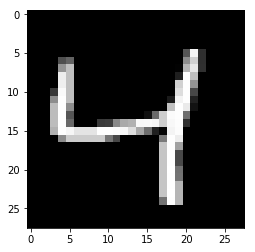

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [13]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

input_size = mnist.train.images[0].shape[0]
target_size = 10

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, input_size])
targets_ = tf.placeholder(tf.float32, [None, input_size])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, input_size)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [14]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [15]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6941
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6887
Epoch: 1/20... Training loss: 0.6854
Epoch: 1/20... Training loss: 0.6811
Epoch: 1/20... Training loss: 0.6765
Epoch: 1/20... Training loss: 0.6679
Epoch: 1/20... Training loss: 0.6631
Epoch: 1/20... Training loss: 0.6547
Epoch: 1/20... Training loss: 0.6436
Epoch: 1/20... Training loss: 0.6311
Epoch: 1/20... Training loss: 0.6195
Epoch: 1/20... Training loss: 0.6055
Epoch: 1/20... Training loss: 0.5912
Epoch: 1/20... Training loss: 0.5743
Epoch: 1/20... Training loss: 0.5593
Epoch: 1/20... Training loss: 0.5407
Epoch: 1/20... Training loss: 0.5277
Epoch: 1/20... Training loss: 0.5051
Epoch: 1/20... Training loss: 0.4841
Epoch: 1/20... Training loss: 0.4659
Epoch: 1/20... Training loss: 0.4504
Epoch: 1/20... Training loss: 0.4346
Epoch: 1/20... Training loss: 0.4274
Epoch: 1/20... Training loss: 0.4090
Epoch: 1/20... Training loss: 0.3941
Epoch: 1/20... Training loss: 0.3811
E

Epoch: 1/20... Training loss: 0.2162
Epoch: 1/20... Training loss: 0.2237
Epoch: 1/20... Training loss: 0.2033
Epoch: 1/20... Training loss: 0.2125
Epoch: 1/20... Training loss: 0.2120
Epoch: 1/20... Training loss: 0.2133
Epoch: 1/20... Training loss: 0.2059
Epoch: 1/20... Training loss: 0.2011
Epoch: 1/20... Training loss: 0.2179
Epoch: 1/20... Training loss: 0.2081
Epoch: 1/20... Training loss: 0.2177
Epoch: 1/20... Training loss: 0.2075
Epoch: 1/20... Training loss: 0.2097
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.2050
Epoch: 1/20... Training loss: 0.2056
Epoch: 1/20... Training loss: 0.2003
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.2053
Epoch: 1/20... Training loss: 0.2057
Epoch: 1/20... Training loss: 0.2023
Epoch: 1/20... Training loss: 0.1983
Epoch: 1/20... Training loss: 0.2033
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1990
Epoch: 1/20... Training loss: 0.1878
E

Epoch: 2/20... Training loss: 0.1699
Epoch: 2/20... Training loss: 0.1702
Epoch: 2/20... Training loss: 0.1673
Epoch: 2/20... Training loss: 0.1679
Epoch: 2/20... Training loss: 0.1636
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1650
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1694
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1641
Epoch: 2/20... Training loss: 0.1666
Epoch: 2/20... Training loss: 0.1653
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1654
Epoch: 2/20... Training loss: 0.1664
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1633
Epoch: 2/20... Training loss: 0.1661
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1641
Epoch: 2/20... Training loss: 0.1637
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1667
E

Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1457
Epoch: 3/20... Training loss: 0.1439
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1454
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1430
Epoch: 3/20... Training loss: 0.1467
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1415
E

Epoch: 4/20... Training loss: 0.1305
Epoch: 4/20... Training loss: 0.1327
Epoch: 4/20... Training loss: 0.1324
Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1318
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1309
Epoch: 4/20... Training loss: 0.1326
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1335
Epoch: 4/20... Training loss: 0.1323
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1308
Epoch: 4/20... Training loss: 0.1281
E

Epoch: 5/20... Training loss: 0.1223
Epoch: 5/20... Training loss: 0.1231
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1227
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1243
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1196
Epoch: 5/20... Training loss: 0.1208
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1247
Epoch: 5/20... Training loss: 0.1243
Epoch: 5/20... Training loss: 0.1226
Epoch: 5/20... Training loss: 0.1222
Epoch: 5/20... Training loss: 0.1217
Epoch: 5/20... Training loss: 0.1210
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1202
Epoch: 5/20... Training loss: 0.1238
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1183
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1223
Epoch: 5/20... Training loss: 0.1225
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1191
E

Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1139
Epoch: 6/20... Training loss: 0.1139
E

Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1123
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1054
E

Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1011
E

Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1042
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1045
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1054
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0964
E

Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.1035
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.1015
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.1020
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0958
E

Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.1002
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.1035
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0900
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0981
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0979
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0991
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

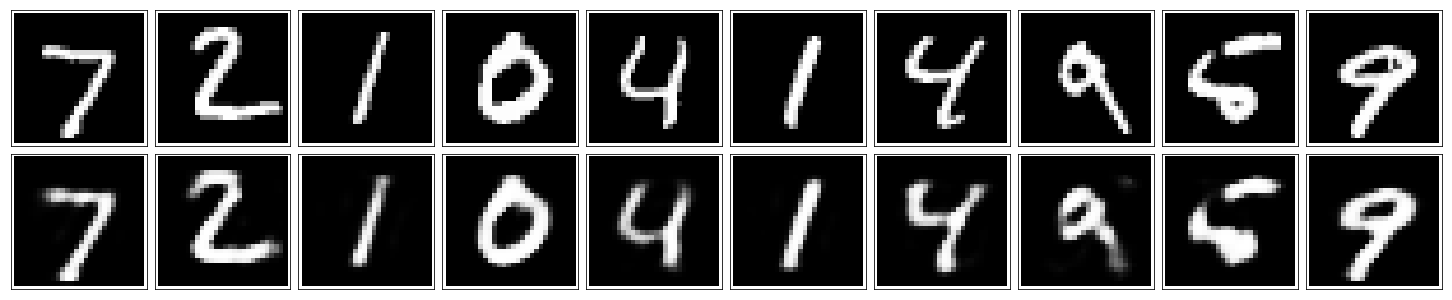

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.